In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
plt.rcParams.update({'font.size': 20})

In [2]:
df = pd.read_table('./datasets/A.txt',delimiter=';')

In [3]:
df

,time (YYYY-MM-DD-HH),significant wave height (m),zero-up-crossing period (s)
0,1996-01-01-00,0.2845,4.7252
1,1996-01-01-01,0.2774,4.6210
2,1996-01-01-02,0.3062,4.1545
3,1996-01-01-03,0.3023,4.7619
4,1996-01-01-04,0.2803,4.9947
...,...,...,...
82800,2005-12-31-19,0.9054,6.4082
82801,2005-12-31-20,0.9346,6.8773
82802,2005-12-31-21,1.0197,6.9386
82803,2005-12-31-22,1.1274,7.5294


In [4]:
np.max(df.iloc[:,1])

7.0994

In [5]:
np.max(df.iloc[:,2])

13.1326

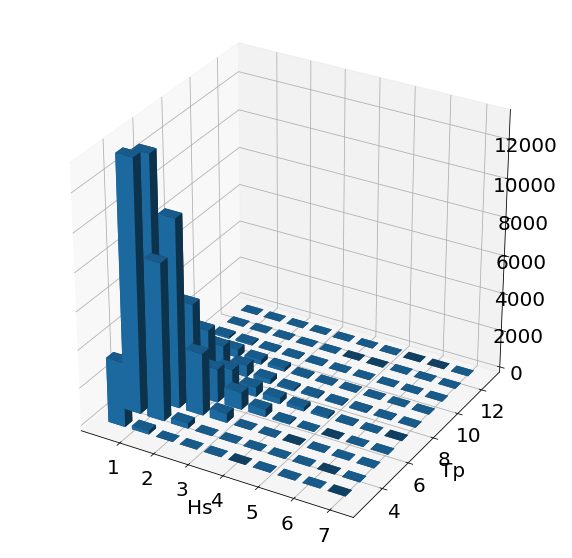

In [6]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(df.iloc[:,1], df.iloc[:,2])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

ax.set_xlabel('Hs')
ax.set_ylabel('Tp')

plt.show()

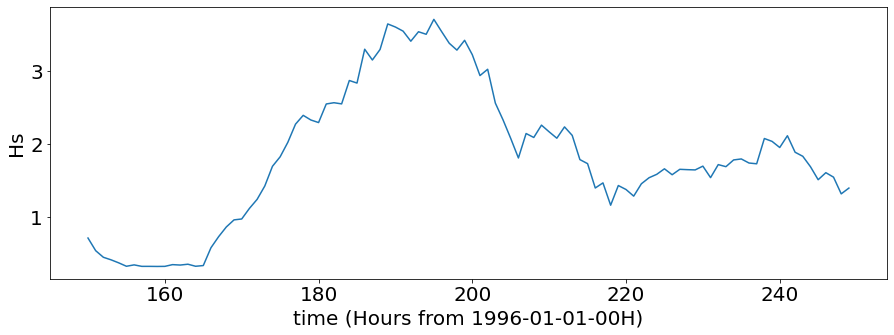

In [7]:
plt.figure(figsize=[15,5])
plt.plot(df.iloc[150:250,1])
plt.ylabel('Hs')
plt.xlabel('time (Hours from 1996-01-01-00H)')
plt.show()

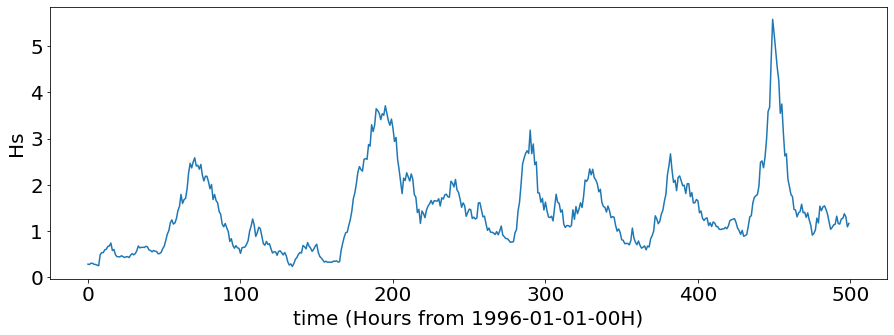

In [8]:
plt.figure(figsize=[15,5])
plt.plot(df.iloc[:500,1])
plt.ylabel('Hs')
plt.xlabel('time (Hours from 1996-01-01-00H)')
plt.show()

# Matrix Profile

In [9]:
m = 50 # window size
# find a motif(pattern)
# c1: matrix profile (smallest euclidean distance)
# c2: matrix profile indices
# c3: left matrix profile indices
# c4: right matrix profile indices
mp = stumpy.gpu_stump(df.iloc[:,1],m) 

In [10]:
mp.shape

(82756, 4)

In [11]:
mp[1000,:]

array([3.975019785261787, 35264, 932, 35264], dtype=object)

# Motif

In [12]:
motif_idx = np.argsort(mp[:, 0])[0] #closest pair
nearest_neighbor_idx = mp[motif_idx, 1]

In [13]:
print(motif_idx,nearest_neighbor_idx)

44173 44374


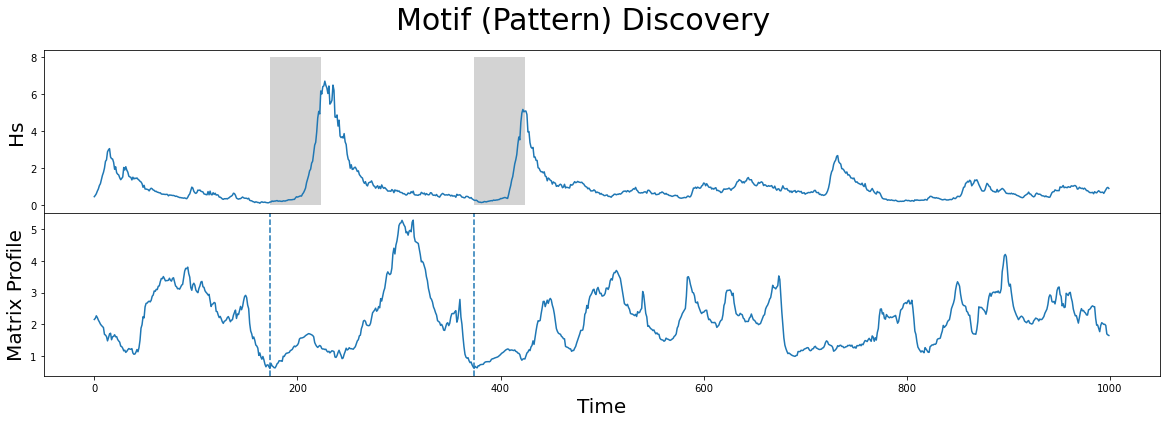

In [14]:
%matplotlib inline
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df.iloc[44000:45000,1].values)
axs[0].set_ylabel('Hs', fontsize='20')
rect = Rectangle((motif_idx-44000, 0), m, 8, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx-44000, 0), m, 8, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx-44000, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx-44000, linestyle="dashed")
axs[1].plot(mp[44000:45000, 0])
plt.show()

# Discord

In [15]:
discord_idx = np.argsort(mp[:, 0])[-1]
nearest_neighbor_distance = mp[discord_idx, 0]

In [16]:
print(discord_idx,nearest_neighbor_distance)

63390 6.627888399887515


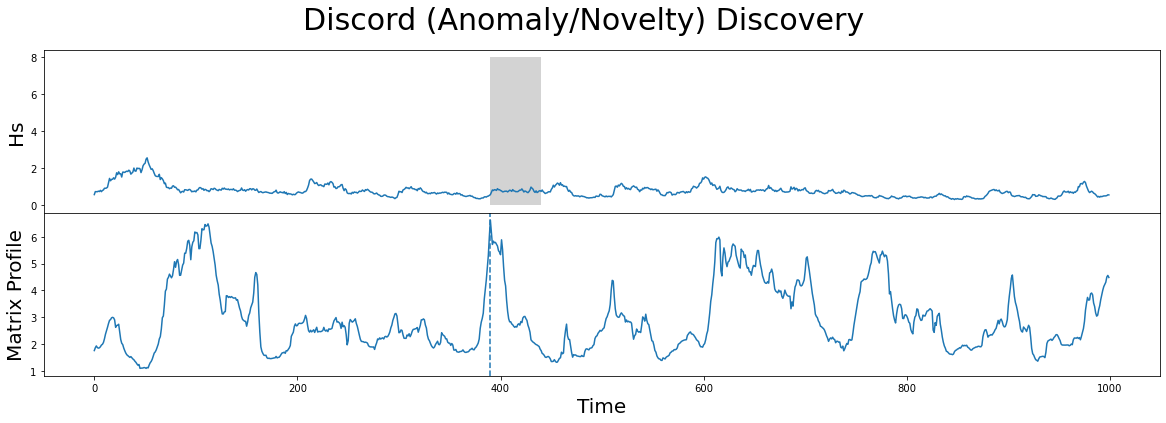

In [17]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(df.iloc[63000:64000,1].values)
axs[0].set_ylabel('Hs', fontsize='20')
rect = Rectangle((discord_idx-63000, 0), m, 8, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx-63000, linestyle="dashed")
axs[1].plot(mp[63000:64000, 0])
plt.show()